In [8]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

with open('../Session_03/github_repos_with_users.json') as json_file:
    data = json.load(json_file)

In [9]:
df = pd.json_normalize(data, record_path='mentionableUsers', meta=['name', 'updatedAt', 'url'], record_prefix='user_')

In [10]:
df = df[df.user_login != 'dominikb1888']
df = df[df.user_login != 'ProfEnergyHuber']

### Cleaning the Data

In [11]:
# df.apply(lambda x: x['Formula'].replace('Length', str(x['Length'])), axis=1)

# Remove String 'user_login' from 'name'
df['new'] = df.apply(lambda x: x['name'].replace((x['user_login']), ''), 1)
df['session_no'] = df['new'].str.split('-', expand=True)[0]
df['exercise_no'] = df['new'].str.split('-', expand=True)[1]
df['exercise_name'] =  df['new'].str.split('-', expand=True)[2] + ' ' +  df['new'].str.split('-', expand=True)[3]

In [12]:
dff = df[['session_no', 'exercise_no', 'exercise_name', 'user_login', 'url','updatedAt']]
dff = (dff
  .astype({
     'session_no':  'int8',
     'exercise_no': 'int8',
     'exercise_name': 'category',
     'user_login': 'category',
     'updatedAt': 'datetime64[ns]',
  })
  .sort_values('updatedAt', ascending=True)
)
dff

,session_no,exercise_no,exercise_name,user_login,url,updatedAt
1872,1,1,hello world,michelleschmidt,https://github.com/DB-Teaching/01-01-hello-wor...,2022-03-16 08:21:57
1847,1,1,hello world,cleverjohnson,https://github.com/DB-Teaching/01-01-hello-wor...,2022-03-16 08:22:00
1881,1,1,hello world,ShahrimaAkter,https://github.com/DB-Teaching/01-01-hello-wor...,2022-03-16 08:22:29
1878,1,1,hello world,Tanmaytc25,https://github.com/DB-Teaching/01-01-hello-wor...,2022-03-16 08:22:50
987,1,1,hello world,joeniho,https://github.com/DB-Teaching/01-01-hello-wor...,2022-03-16 08:22:55
...,...,...,...,...,...,...
17,1,8,bob,timht9,https://github.com/DB-Teaching/01-08-bob-timht9,2022-10-25 15:55:14
14,1,9,resistor color,timht9,https://github.com/DB-Teaching/01-09-resistor-...,2022-10-25 16:19:39
10,1,2,leap,zippoluzbel,https://github.com/DB-Teaching/01-02-leap-zipp...,2022-10-25 18:40:49
8,1,12,difference of,verosuarez,https://github.com/DB-Teaching/01-12-differenc...,2022-10-25 18:46:14


### Preparing the Data for Visualization

In [13]:
pivot_table = dff.pivot_table(index="user_login", columns="session_no", values='url', aggfunc='count')
pivot_table['sum_cols'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values('sum_cols', ascending=False).iloc[0:20]
pivot_table.drop('sum_cols', axis=1, inplace=True)
pivot_table

session_no,1,2,3,4,5,7,8,9,10,11,12,13,14,15
user_login,,,,,,,,,,,,,,
OliviaA22,10,14,12,10,9,15,17,9,8,3,3,1,1,1
Ikesee-Ikemefuna,10,13,12,10,8,6,1,1,0,0,0,0,0,0
cleverjohnson,11,14,5,2,1,0,0,0,0,0,0,0,0,0
fraupozh,10,13,9,0,0,0,0,0,0,0,0,0,0,0
MadalinaLupacescu,10,9,0,0,0,0,0,0,0,0,0,0,0,0
asfandyarsheikh,11,3,0,0,0,0,0,0,0,0,0,0,0,0
Amit021,6,8,0,0,0,0,0,0,0,0,0,0,0,0
shreeja-shreeja,11,1,0,0,0,0,0,0,0,0,0,0,0,0
michelleschmidt,8,2,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
ex_count = dff[["session_no","exercise_no"]].groupby("session_no").agg("nunique").to_dict()['exercise_no']
ex_count[4] = 10
ex_count

{1: 11, 2: 14, 3: 12, 4: 10, 5: 9, 7: 15, 8: 17, 9: 9, 10: 8, 11: 3, 12: 3, 13: 1, 14: 1, 15: 1}

In [15]:
rel = pivot_table.copy(deep=True)
for session in ex_count.keys():
    rel[session] = rel[session].map(lambda i: int(100*(i/ex_count[session])))
rel

session_no,1,2,3,4,5,7,8,9,10,11,12,13,14,15
user_login,,,,,,,,,,,,,,
OliviaA22,90,100,100,100,100,100,100,100,100,100,100,100,100,100
Ikesee-Ikemefuna,90,92,100,100,88,40,5,11,0,0,0,0,0,0
cleverjohnson,100,100,41,20,11,0,0,0,0,0,0,0,0,0
fraupozh,90,92,75,0,0,0,0,0,0,0,0,0,0,0
MadalinaLupacescu,90,64,0,0,0,0,0,0,0,0,0,0,0,0
asfandyarsheikh,100,21,0,0,0,0,0,0,0,0,0,0,0,0
Amit021,54,57,0,0,0,0,0,0,0,0,0,0,0,0
shreeja-shreeja,100,7,0,0,0,0,0,0,0,0,0,0,0,0
michelleschmidt,72,14,8,0,0,0,0,0,0,0,0,0,0,0


### Plotting the Heatmap

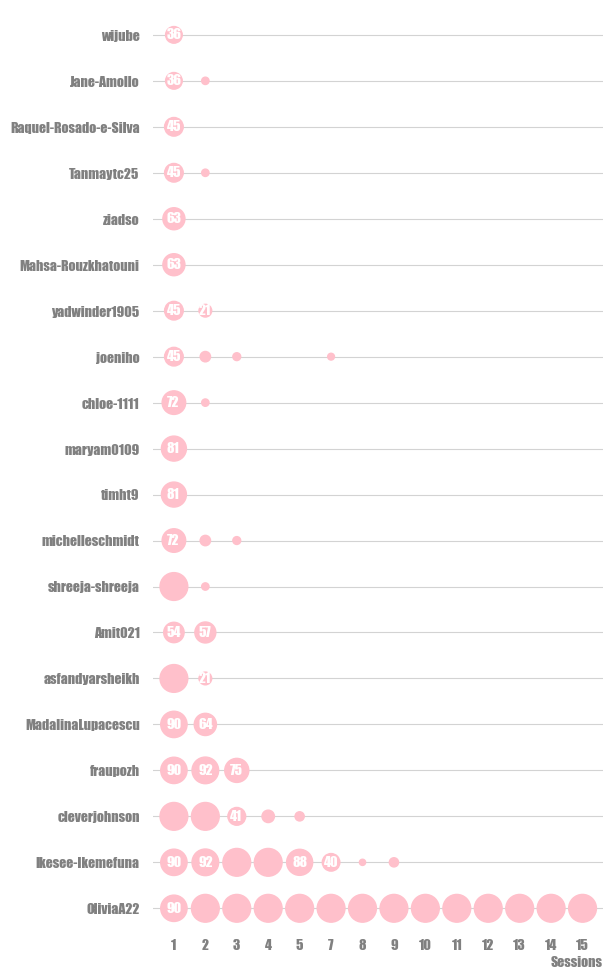

In [44]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# Define colors
COLORS = ["#0C2C84", "#225EA8", "#1D91C0", "#41B6C4", "#7FCDBB", "#C7E9B4", "#FFFFCC"]
# Create colormap
cmap = mcolors.LinearSegmentedColormap.from_list("colormap", COLORS, N=256)


def create_scatter_df(rel):
    names = dict(enumerate(rel.index))
    sessions = rel.columns

    scatter_dict = []
    for i, line in enumerate(rel.values):
        for j, item in enumerate(line):
            scatter_dict.append({
                'name': names[i], 
                'name_rank': i+1, 
                'session': sessions[j], 
                'value': item,
            })

    return pd.DataFrame(scatter_dict)
    

def plot_heatmap(ax, top_thirty):
   
    sessions = rel.columns
    for i, session in enumerate(sessions):
        d = top_thirty[top_thirty["session"] == session]
        y = d["name"]
        x = [i] * len(y)
        
        # Generate colors. No need to normalize since proportions are between 0 and 1.
        color = 'pink'
        
        # Plot the markers for the selected company
        ax.scatter(x, y, color=color, s=d["value"]*4)
        #ax.scatter(x, y, edgecolor='lightgrey', facecolor='none', s=450)
           
        for index, line in d.iterrows():
            #print(line, x_x, y_y)
            if 20 < line['value'] < 100:
                x_x = i
                y_y = line['name_rank'] - 1
                ax.annotate(line['value'], 
                            (x_x, y_y),  
                            xytext=(-7, -4.15), 
                            textcoords="offset pixels", 
                            fontsize=10, 
                            color='white',
                            fontfamily='Impact')
               
    
    # Remove all spines
    ax.set_frame_on(False)

    # Set grid lines with some transparency
    ax.grid(color='lightgrey', axis='y')

    # Make sure grid lines are behind other objects
    ax.set_axisbelow(True)

    # Set position for x ticks
    ax.set_xticks(np.arange(len(sessions)))

    # Set labels for the x ticks (the names of the types of plastic)
    ax.set_xticklabels(sessions, fontfamily='Impact')
    
    # Remove tick marks by setting their size to 0. Set text color to "0.3" (a type of grey)
    ax.tick_params(size=0, colors="grey")

    # Set label for horizontal axis.
    ax.set_xlabel("Sessions", loc="right", fontfamily='Impact', color='grey')
    
    # Default vertical limits are shrunken by 0.75
    y_shrunk = 0.4
    y_lower, y_upper = ax.get_ylim()
    ax.set_ylim(y_lower + y_shrunk, y_upper - y_shrunk)

    for label in ax.yaxis.get_ticklabels():
        label.set_fontfamily('Impact')
        label.set_x(-.02)
    
    return ax


fig, ax = plt.subplots(figsize=(5.8, 12))
plot_heatmap(ax, create_scatter_df(rel))

## Heatmap with Widget